In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import os

# Load your heart disease dataset (replace 'heart_disease.csv' with your dataset's filename)
data = pd.read_csv('heart_new.csv')

# Preprocessing: separate features and target
X = data.drop('HeartDisease', axis=1)  # Assuming 'HeartDisease' is the target column
y = data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for different types of columns
numeric_features = ['age', 'sex','chest_pain_type','resting_BP','chol','fasting_blood_sugar',
                    'rest_ecg','max_heart_rate','exercise_included_angina','oldpeak','slope','ca','thal']


numeric_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Choose a machine learning algorithm (e.g., Random Forest Classifier)
model = RandomForestClassifier()

# Train the model
model.fit(X_train_preprocessed, y_train)

# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')

# Load the trained model for predictions
loaded_model = joblib.load('heart_disease_model.pkl')

# Load the new testing dataset provided at runtime
new_testing_data = pd.read_csv('heart_testing_new_2.csv')

# Fit the preprocessor and transform the new testing data
X_new_preprocessed = preprocessor.transform(new_testing_data)

# Make probability predictions
probability_predictions = loaded_model.predict_proba(X_new_preprocessed)[:, 1] * 100  # Multiply by 100 for percentage

# Add the 'HeartAttackProbability' predictions to the new testing data
new_testing_data['HeartDiseaseProbability'] = probability_predictions

# Save the results to a new CSV file
new_testing_data.to_csv('predicted_results.csv', index=False)

# Evaluate the model on the test set (optional)
X_test_preprocessed = preprocessor.transform(X_test)
test_predictions = loaded_model.predict(X_test_preprocessed)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)
file_path='predicted_results.csv'
os.system(f'start excel {file_path}')



Test Accuracy: 0.9853658536585366


0

C:\Users\subha\AppData\Local\Temp\ipykernel_14744\2028815389.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_disease_counts = data.groupby(['AgeInterval', 'sex'])['HeartDisease'].sum().unstack()


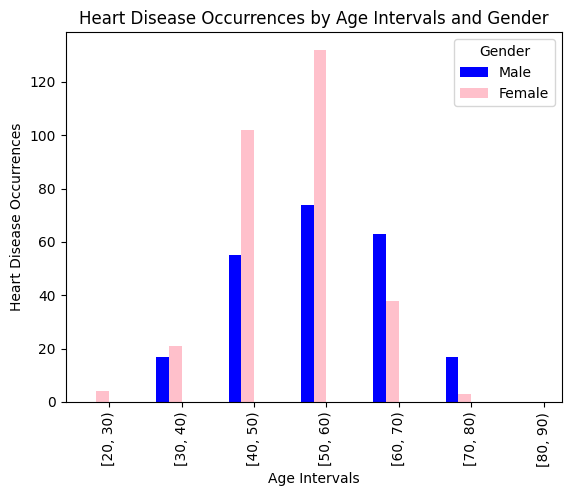

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the heart.csv file into a DataFrame
data = pd.read_csv('heart_new.csv')

# Define age intervals with a step of 10
age_intervals = range(20, 100, 10)

# Categorize ages into intervals
data['AgeInterval'] = pd.cut(data['age'], bins=age_intervals, right=False)

# Create a DataFrame with heart disease occurrences for each age interval and gender
heart_disease_counts = data.groupby(['AgeInterval', 'sex'])['HeartDisease'].sum().unstack()

# Plotting the grouped bar graph
heart_disease_counts.plot(kind='bar', width=0.35, position=1, color=['blue', 'pink'])
plt.xlabel('Age Intervals')
plt.ylabel('Heart Disease Occurrences')
plt.title('Heart Disease Occurrences by Age Intervals and Gender')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()
